<h1 style="background-color:#7B68EE; font-family: newtimeroman; font-size: 250%; color: white; border-radius: 80px 20px; padding: 25px; text-align: center;">
  <b>Kyphosis Disease EDA Project</b>
</h1>

Kyphosis is a problem that occurs when the upper part of the spine curves outwards and the lower part curves inwards. In fact, we can call kyphosis a hunchback problem, but not all hunchbacks are kyphosed.

A curvature of 20 to 50 degrees on a person's side x-ray can be considered kyphosis.

### <font color='CC0066'> <b>Age Range of Occurrence</b></font>

Developmental problems with the baby's spine in utero or poor posture during puberty, a family history of spinal problems, metabolic conditions such as diabetes, or trauma resulting in a spinal fracture from an untreated or poorly healed accident.


<h2 style="background-color: #7B68EE; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Import Libraries</b>
</h2>

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

In [4]:
kyp = pd.read_csv("kyphosis.csv")

<h1 style="background-color: #7B68EE; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Analyzing The Data</b>
</h1>

In [5]:
print(f"This data has {kyp.shape[1]} variables, {kyp.shape[0]} observations, in total {kyp.size} data present and {kyp.isnull().sum().sum()} Null values.")

This data has 4 variables, 81 observations, in total 324 data present and 0 Null values.


In [6]:
# Display the first five rows of the dataset
kyp.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
# Display the last five rows of the dataset
kyp.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [8]:
kyp.sample(5)

,Kyphosis,Age,Number,Start
79,present,42,7,6
37,present,52,5,6
28,absent,4,3,16
55,absent,72,5,15
67,absent,159,4,13


In [9]:
# Print summary of the dataframe. No empty data
kyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [10]:
# View statistical details
kyp.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0


In [11]:
# Check for missing values
kyp.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [12]:
print(f"Max age is {kyp.Age.max()}, min age is {kyp.Age.min()} and average age is {kyp.Age.mean()} in months")

Max age is 206, min age is 1 and average age is 83.65432098765432 in months


In [13]:
kyp[kyp['Kyphosis'] == 'present'] # 17 

,Kyphosis,Age,Number,Start
2,present,128,4,5
9,present,59,6,12
10,present,82,5,14
21,present,105,6,5
22,present,96,3,12
24,present,15,7,2
37,present,52,5,6
39,present,91,5,12
40,present,73,5,1
45,present,139,3,10


In [14]:
kyp[kyp['Kyphosis'] == 'absent'] # 64

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
...,...,...,...,...
74,absent,11,3,15
75,absent,178,4,15
77,absent,26,7,13
78,absent,120,2,13


<h2 style="background-color: #7B68EE; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>List the average, minimum and maximum age (in years) considered in this study using 2 methods</b>
</h2>

In [15]:
kyp['Age'].sum() / kyp['Age'].value_counts().sum() / 12

6.97119341563786

In [16]:
round(kyp['Age'].mean() / 12, 2)

6.97

In [17]:
sorted_kyp_age = sorted(kyp.Age)
min_age_in_years = round(sorted_kyp_age[0] / 12, 2)
max_age_in_years = round(sorted_kyp_age[-1] / 12, 2)

print(min_age_in_years)
print(max_age_in_years)

0.08
17.17


In [18]:
round(kyp['Age'].min() / 12, 2)

0.08

In [19]:
round(kyp['Age'].max() / 12, 2)

17.17

<h2 style="background-color: #7B68EE; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Convert the age column datatype from int64 to float64</b>
</h2>

In [20]:
kyp['Age'] = kyp['Age'].astype('float64')

In [21]:
kyp.dtypes

Kyphosis     object
Age         float64
Number        int64
Start         int64
dtype: object

In [22]:
new_columns = {'Age': 'Age_in_months'}
kyp.rename(columns=new_columns, inplace=True)

<h2 style="background-color: #7B68EE; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Define a function that converts age from months to years </b>
</h2>

In [23]:
def month_to_year(x):
    return round(x / 12, 2)

In [24]:
kyp['Age_in_years'] = kyp['Age_in_months'].apply(month_to_year)
kyp['Age_in_years'] = kyp['Age_in_years'].astype('int64')

<h2 style="background-color: #7B68EE; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>What are the features of the oldest and youngest child in this study? </b>
</h2>

In [85]:
kyp.min() #c1

Kyphosis         0.0
Age_in_months    1.0
Number           2.0
Start            1.0
Age_in_years     0.0
dtype: float64

In [26]:
kyp.max() #th11

Kyphosis         present
Age_in_months      206.0
Number                10
Start                 18
Age_in_years          17
dtype: object

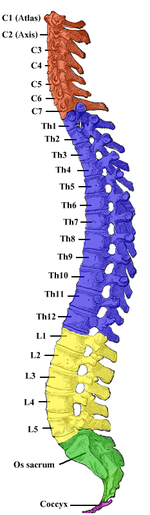

In [27]:
kyp.groupby('Start')['Kyphosis'].count().sort_values(ascending=False)

Start
16    17
13    12
15     7
1      5
12     5
14     5
6      4
9      4
10     4
17     4
3      3
5      3
11     3
2      2
8      2
18     1
Name: Kyphosis, dtype: int64

In [28]:
plt.style.use("seaborn-v0_8-darkgrid")

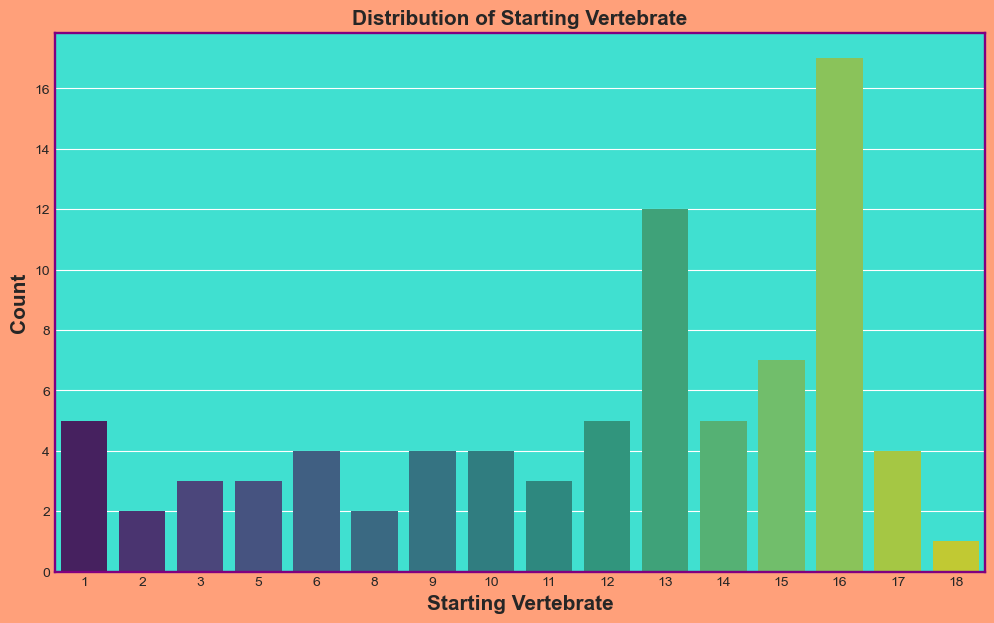

In [29]:
plt.figure(figsize=(12, 7), facecolor="lightsalmon")

ax = plt.axes()
ax.set_facecolor("turquoise")

sns.countplot(x='Start', data=kyp, palette='viridis')

plt.title('Distribution of Starting Vertebrate', fontsize=15, fontweight="bold")
plt.xlabel('Starting Vertebrate', fontsize=15, fontweight="bold")
plt.ylabel('Count', fontsize=15, fontweight="bold")

ax.spines['left'].set_color('purple')
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_color('purple')
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_color('purple')
ax.spines['top'].set_linewidth(1.7)
ax.spines['bottom'].set_color('purple')
ax.spines['bottom'].set_linewidth(1.7)

plt.show()

In [30]:
kyp.groupby('Age_in_years')['Kyphosis'].count().sort_values(ascending=False)

Age_in_years
0     13
10    10
1      7
6      6
11     6
9      5
8      5
5      4
2      4
13     4
14     4
7      3
4      3
3      3
12     2
16     1
17     1
Name: Kyphosis, dtype: int64

In [31]:
kyp.groupby('Number')['Kyphosis'].count().sort_values(ascending=False)

Number
3     23
4     18
5     17
2     12
7      5
6      4
9      1
10     1
Name: Kyphosis, dtype: int64

<h2 style="background-color: #7B68EE; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Scale the raw Age column (in months) using both standardization and Normalization. Perform a sanity check. </b>
</h2>

In [32]:
kyp.groupby('Kyphosis')['Age_in_months'].mean()

Kyphosis
absent     79.890625
present    97.823529
Name: Age_in_months, dtype: float64

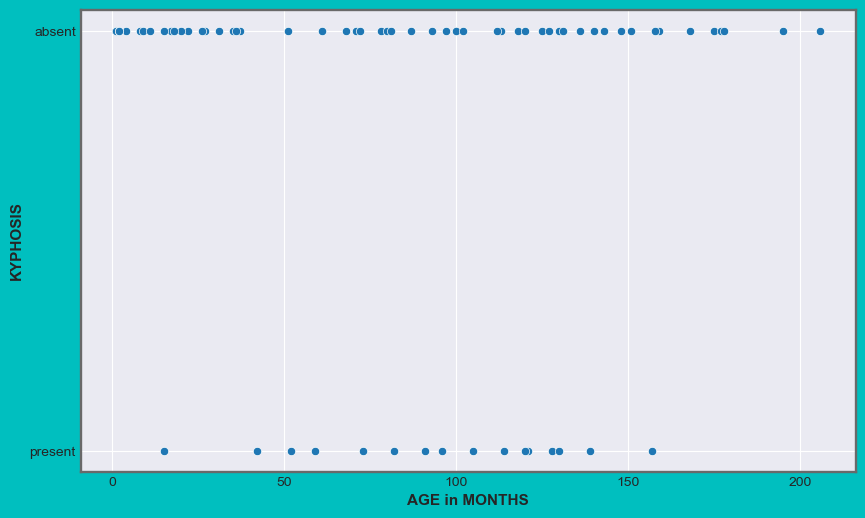

In [33]:
plt.figure(figsize=(10,6), facecolor="c")

ax = plt.axes()

sns.scatterplot(x = "Age_in_months", y ='Kyphosis', data = kyp)

plt.xlabel('AGE in MONTHS', fontsize=11, fontweight="bold")
plt.ylabel('KYPHOSIS', fontsize=11, fontweight="bold")

ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_color('dimgrey')
ax.spines['top'].set_linewidth(1.7)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['bottom'].set_linewidth(1.7)

plt.show()

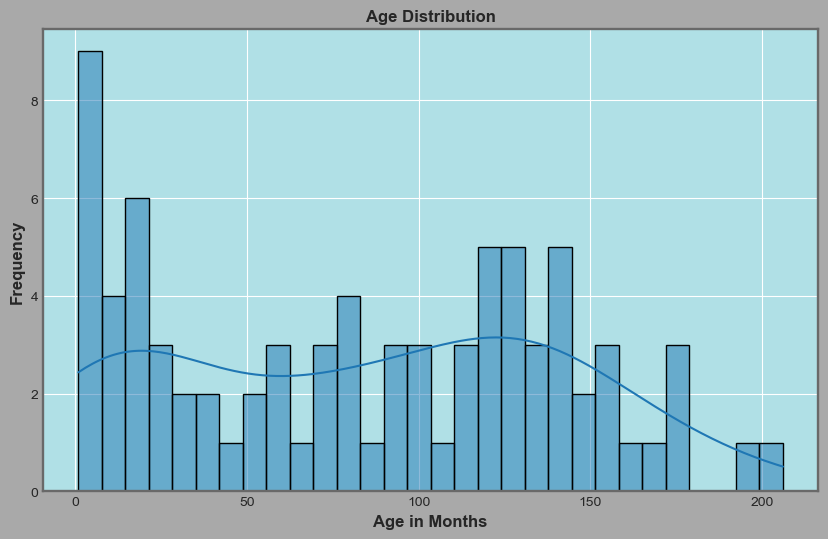

In [34]:
plt.figure(figsize=(10, 6), facecolor="darkgrey")

ax = plt.axes()
ax.set_facecolor("powderblue")

sns.histplot(kyp['Age_in_months'], bins=30, kde=True)


plt.title('Age Distribution', fontsize=12, fontweight="bold")
plt.xlabel('Age in Months', fontsize=12, fontweight="bold")
plt.ylabel('Frequency', fontsize=12, fontweight="bold")

ax.spines['left'].set_color('dimgrey')
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_color('dimgrey')
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_color('dimgrey')
ax.spines['top'].set_linewidth(1.7)
ax.spines['bottom'].set_color('dimgrey')
ax.spines['bottom'].set_linewidth(1.7)


plt.show()

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
temporary_std_age = scaler.fit_transform(kyp['Age_in_months'].values.reshape(-1,1))

In [36]:
kyp.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_in_months,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0
Age_in_years,81.0,6.530864,4.809071,0.0,2.0,7.0,10.0,17.0


In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
temporary_norm_age = scaler.fit_transform(kyp['Age_in_months'].values.reshape(-1,1))

In [38]:
kyp.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_in_months,81.0,83.654321,58.104251,1.0,26.0,87.0,130.0,206.0
Number,81.0,4.049383,1.619423,2.0,3.0,4.0,5.0,10.0
Start,81.0,11.493827,4.883962,1.0,9.0,13.0,16.0,18.0
Age_in_years,81.0,6.530864,4.809071,0.0,2.0,7.0,10.0,17.0


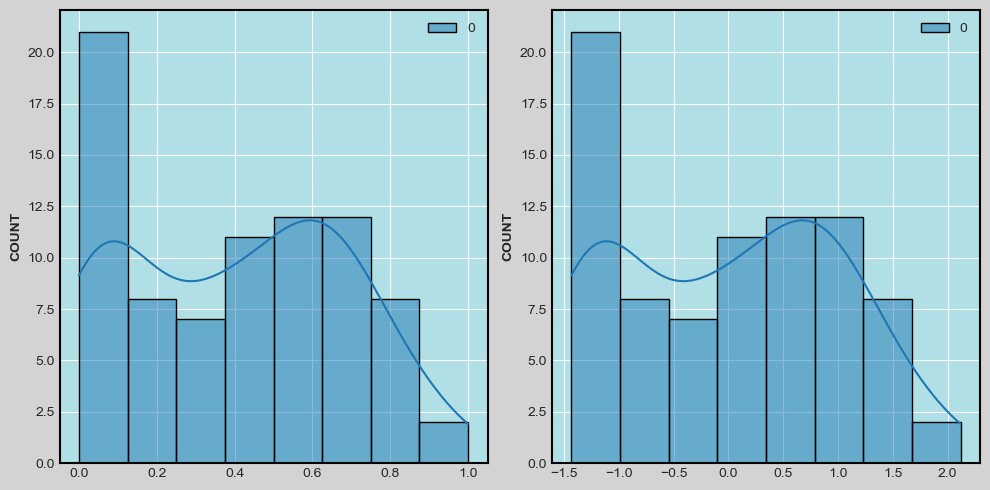

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10,5), facecolor="lightgrey")

sns.histplot(temporary_norm_age, kde=True, ax=ax[0])
ax[0].set_facecolor("powderblue")
ax[0].set_ylabel("COUNT", fontsize=10, fontweight="bold")

sns.histplot(temporary_std_age, kde=True,ax=ax[1])
ax[1].set_facecolor("powderblue")
ax[1].set_ylabel("COUNT", fontsize=10, fontweight="bold")


ax[0].spines['left'].set_color('black')
ax[0].spines['left'].set_linewidth(1.5)
ax[0].spines['right'].set_color('black')
ax[0].spines['right'].set_linewidth(1.5)
ax[0].spines['top'].set_color('black')
ax[0].spines['top'].set_linewidth(1.5)
ax[0].spines['bottom'].set_color('black')
ax[0].spines['bottom'].set_linewidth(1.5)

ax[1].spines['left'].set_color('black')
ax[1].spines['left'].set_linewidth(1.5)
ax[1].spines['right'].set_color('black')
ax[1].spines['right'].set_linewidth(1.5)
ax[1].spines['top'].set_color('black')
ax[1].spines['top'].set_linewidth(1.5)
ax[1].spines['bottom'].set_color('black')
ax[1].spines['bottom'].set_linewidth(1.5)

plt.tight_layout()
plt.show()

<h2 style="background-color: #7B68EE; font-family: newtimeroman; font-size: 150%; color: white; border-radius: 40px 10px; padding: 15px; text-align: center;">
  <b>Perform one hot encoding to the Kyphosis column  </b>
</h2>

In [40]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
kyp['Kyphosis'] = LabelEncoder_y.fit_transform(kyp['Kyphosis'])

In [41]:
kyp

,Kyphosis,Age_in_months,Number,Start,Age_in_years
0,0,71.0,3,5,5
1,0,158.0,3,14,13
2,1,128.0,4,5,10
3,0,2.0,5,1,0
4,0,1.0,4,15,0
...,...,...,...,...,...
76,1,157.0,3,13,13
77,0,26.0,7,13,2
78,0,120.0,2,13,10
79,1,42.0,7,6,3


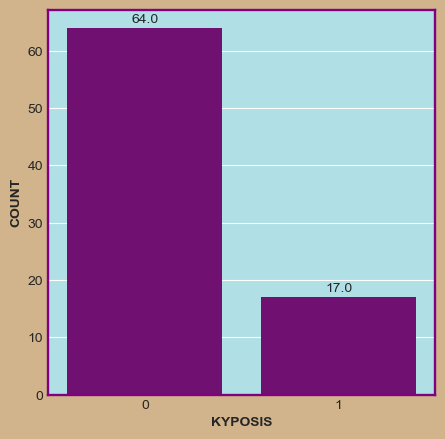

In [42]:
fig, ax = plt.subplots(figsize = (5, 5), facecolor="tan")


ax_tip = sns.countplot(data = kyp, x = "Kyphosis", color='purple')
ax.set_facecolor("powderblue")
ax.set_xlabel("KYPOSIS", fontsize=10, fontweight="bold")
ax.set_ylabel("COUNT", fontsize=10, fontweight="bold")

ax.spines['left'].set_color('purple')
ax.spines['left'].set_linewidth(1.7)
ax.spines['right'].set_color('purple')
ax.spines['right'].set_linewidth(1.7)
ax.spines['top'].set_color('purple')
ax.spines['top'].set_linewidth(1.7)
ax.spines['bottom'].set_color('purple')
ax.spines['bottom'].set_linewidth(1.7)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.33, p.get_height()+1))

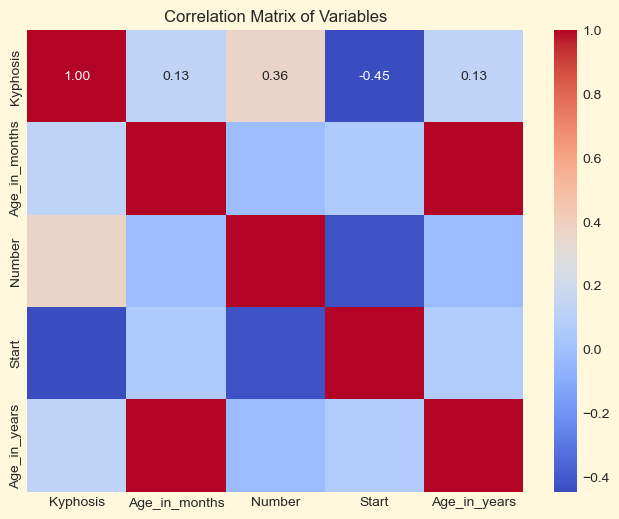

In [43]:
corr = kyp.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(8, 6), facecolor="cornsilk")

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Matrix of Variables')
plt.show()

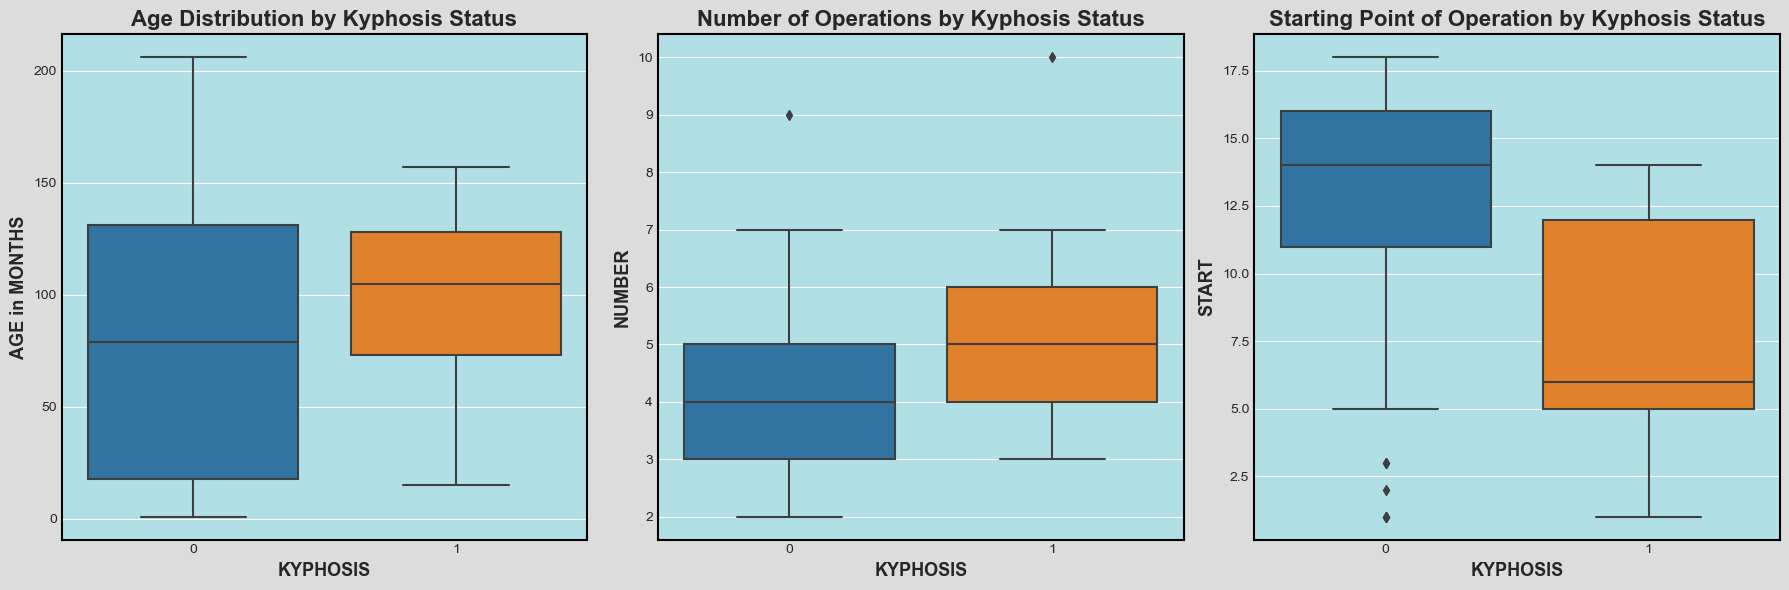

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), facecolor="gainsboro")

# Boxplot for 'Age' vs 'Kyphosis'
sns.boxplot(data=kyp, x='Kyphosis', y='Age_in_months', ax=ax[0])
ax[0].set_title('Age Distribution by Kyphosis Status', fontsize=16, fontweight="bold")
ax[0].set_xlabel("KYPHOSIS", fontsize=13, fontweight="bold")
ax[0].set_ylabel("AGE in MONTHS", fontsize=13, fontweight="bold")
ax[0].set_facecolor("powderblue")

# Boxplot for 'Number' vs 'Kyphosis'
sns.boxplot(data=kyp, x='Kyphosis', y='Number', ax=ax[1])
ax[1].set_title('Number of Operations by Kyphosis Status',fontsize=16, fontweight="bold")
ax[1].set_xlabel("KYPHOSIS", fontsize=13, fontweight="bold")
ax[1].set_ylabel("NUMBER", fontsize=13, fontweight="bold")
ax[1].set_facecolor("powderblue")

# Boxplot for 'Start' vs 'Kyphosis'
sns.boxplot(data=kyp, x='Kyphosis', y='Start', ax=ax[2])
ax[2].set_title('Starting Point of Operation by Kyphosis Status', fontsize=16, fontweight="bold")
ax[2].set_xlabel("KYPHOSIS", fontsize=13, fontweight="bold")
ax[2].set_ylabel("START", fontsize=13, fontweight="bold")
ax[2].set_facecolor("powderblue")

ax[0].spines['left'].set_color('black')
ax[0].spines['left'].set_linewidth(1.5)
ax[0].spines['right'].set_color('black')
ax[0].spines['right'].set_linewidth(1.5)
ax[0].spines['top'].set_color('black')
ax[0].spines['top'].set_linewidth(1.5)
ax[0].spines['bottom'].set_color('black')
ax[0].spines['bottom'].set_linewidth(1.5)

ax[1].spines['left'].set_color('black')
ax[1].spines['left'].set_linewidth(1.5)
ax[1].spines['right'].set_color('black')
ax[1].spines['right'].set_linewidth(1.5)
ax[1].spines['top'].set_color('black')
ax[1].spines['top'].set_linewidth(1.5)
ax[1].spines['bottom'].set_color('black')
ax[1].spines['bottom'].set_linewidth(1.5)

ax[2].spines['left'].set_color('black')
ax[2].spines['left'].set_linewidth(1.5)
ax[2].spines['right'].set_color('black')
ax[2].spines['right'].set_linewidth(1.5)
ax[2].spines['top'].set_color('black')
ax[2].spines['top'].set_linewidth(1.5)
ax[2].spines['bottom'].set_color('black')
ax[2].spines['bottom'].set_linewidth(1.5)

# Display the plots
plt.tight_layout()

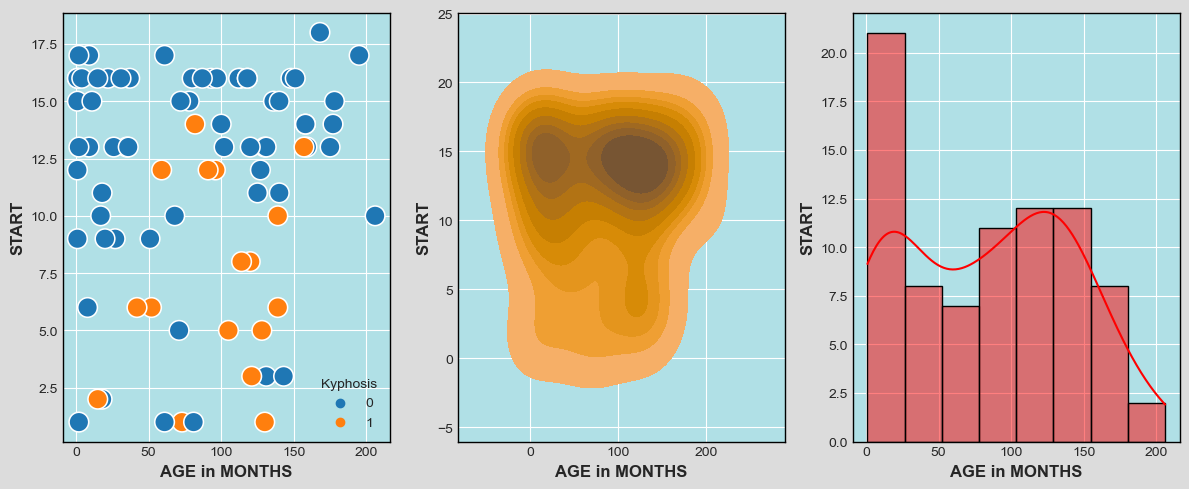

In [45]:
fig, ax = plt.subplots(1, 3, figsize = (12, 5), facecolor="gainsboro")

sns.scatterplot(x = "Age_in_months", y = "Start", data = kyp, s = 200, hue = "Kyphosis", ax=ax[0])
ax[0].set_xlabel("AGE in MONTHS", fontsize=12, fontweight="bold")
ax[0].set_ylabel("START", fontsize=12, fontweight="bold")
ax[0].set_facecolor("powderblue")

sns.kdeplot(x = "Age_in_months", data = kyp, y = "Start", color='orange', ax=ax[1], fill= True)
ax[1].set_xlabel("AGE in MONTHS", fontsize=12, fontweight="bold")
ax[1].set_ylabel("START", fontsize=12, fontweight="bold")
ax[1].set_facecolor("powderblue")

sns.histplot(x = "Age_in_months", data = kyp, color='red',kde = True, ax=ax[2])
ax[2].set_xlabel("AGE in MONTHS", fontsize=12, fontweight="bold")
ax[2].set_ylabel("START", fontsize=12, fontweight="bold")
ax[2].set_facecolor("powderblue")

ax[0].spines['left'].set_color('black')
ax[0].spines['left'].set_linewidth(1)
ax[0].spines['right'].set_color('black')
ax[0].spines['right'].set_linewidth(1)
ax[0].spines['top'].set_color('black')
ax[0].spines['top'].set_linewidth(1)
ax[0].spines['bottom'].set_color('black')
ax[0].spines['bottom'].set_linewidth(1)

ax[1].spines['left'].set_color('black')
ax[1].spines['left'].set_linewidth(1)
ax[1].spines['right'].set_color('black')
ax[1].spines['right'].set_linewidth(1)
ax[1].spines['top'].set_color('black')
ax[1].spines['top'].set_linewidth(1)
ax[1].spines['bottom'].set_color('black')
ax[1].spines['bottom'].set_linewidth(1)

ax[2].spines['left'].set_color('black')
ax[2].spines['left'].set_linewidth(1)
ax[2].spines['right'].set_color('black')
ax[2].spines['right'].set_linewidth(1)
ax[2].spines['top'].set_color('black')
ax[2].spines['top'].set_linewidth(1)
ax[2].spines['bottom'].set_color('black')
ax[2].spines['bottom'].set_linewidth(1)

plt.tight_layout()
plt.show()

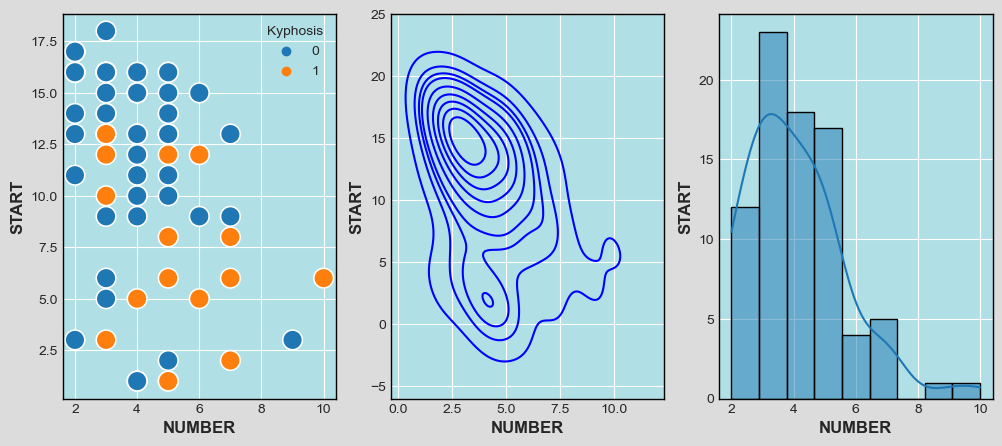

In [46]:
fig, ax = plt.subplots(1, 3, figsize = (12, 5), facecolor="gainsboro")

sns.scatterplot(x = "Number", y = "Start", data = kyp, s = 200, hue = "Kyphosis", ax=ax[0])
ax[0].set_xlabel("NUMBER", fontsize=12, fontweight="bold")
ax[0].set_ylabel("START", fontsize=12, fontweight="bold")
ax[0].set_facecolor("powderblue")

sns.histplot(x = "Number", data = kyp, kde = True, ax=ax[2])
ax[1].set_xlabel("NUMBER", fontsize=12, fontweight="bold")
ax[1].set_ylabel("START", fontsize=12, fontweight="bold")
ax[1].set_facecolor("powderblue")


sns.kdeplot(x = "Number", data = kyp, y = "Start", color='blue', ax=ax[1])
ax[2].set_xlabel("NUMBER", fontsize=12, fontweight="bold")
ax[2].set_ylabel("START", fontsize=12, fontweight="bold")
ax[2].set_facecolor("powderblue")

ax[0].spines['left'].set_color('black')
ax[0].spines['left'].set_linewidth(1)
ax[0].spines['right'].set_color('black')
ax[0].spines['right'].set_linewidth(1)
ax[0].spines['top'].set_color('black')
ax[0].spines['top'].set_linewidth(1)
ax[0].spines['bottom'].set_color('black')
ax[0].spines['bottom'].set_linewidth(1)

ax[1].spines['left'].set_color('black')
ax[1].spines['left'].set_linewidth(1)
ax[1].spines['right'].set_color('black')
ax[1].spines['right'].set_linewidth(1)
ax[1].spines['top'].set_color('black')
ax[1].spines['top'].set_linewidth(1)
ax[1].spines['bottom'].set_color('black')
ax[1].spines['bottom'].set_linewidth(1)

ax[2].spines['left'].set_color('black')
ax[2].spines['left'].set_linewidth(1)
ax[2].spines['right'].set_color('black')
ax[2].spines['right'].set_linewidth(1)
ax[2].spines['top'].set_color('black')
ax[2].spines['top'].set_linewidth(1)
ax[2].spines['bottom'].set_color('black')
ax[2].spines['bottom'].set_linewidth(1)

plt.show()

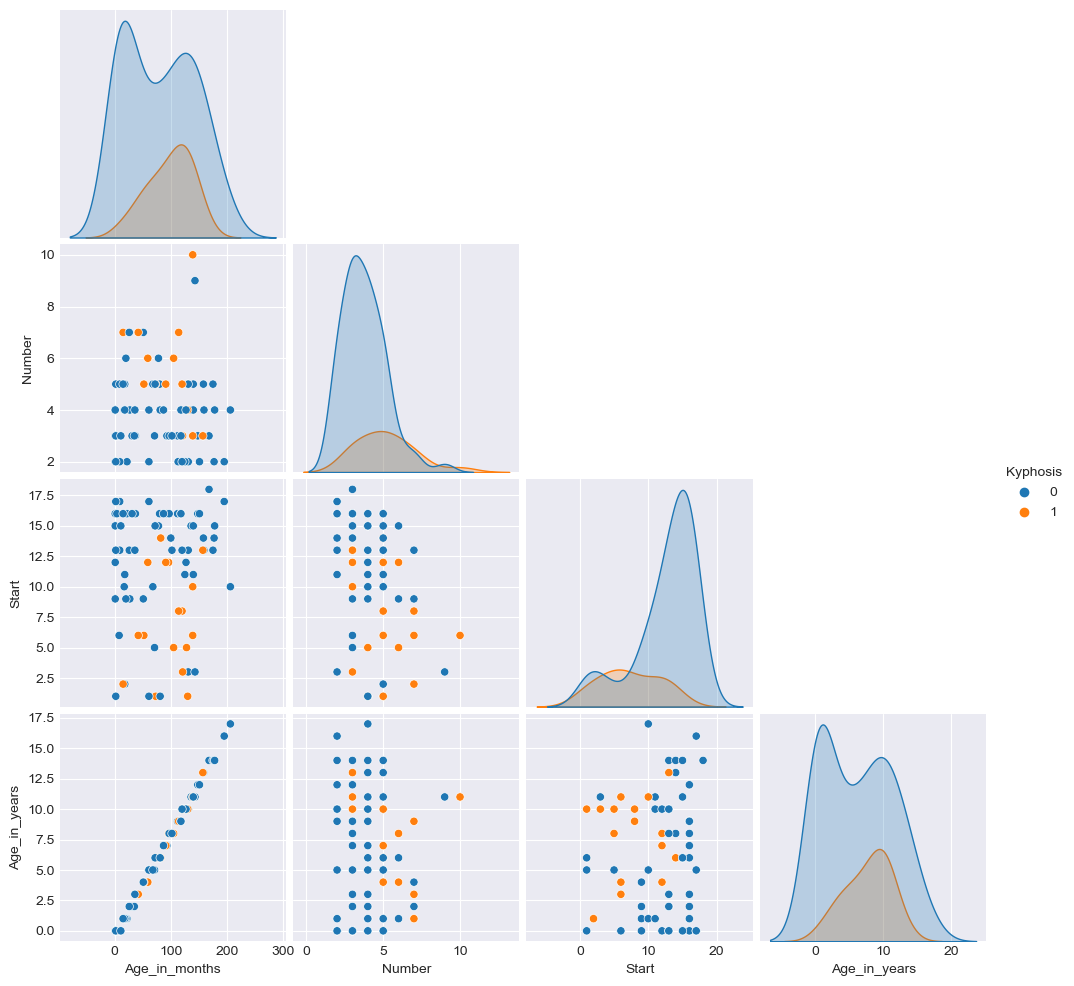

In [47]:
sns.pairplot(kyp, hue='Kyphosis',corner=True)
plt.show()

In [48]:
kyp.to_csv('kyphosis_eda.csv')